In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('TelcoCustomerChurn.csv')
data.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3006,9685-WKZGT,Male,1,No,No,14,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.95,1036.75,Yes
1598,7552-KEYGT,Male,0,Yes,No,27,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.55,520.55,No
1316,9788-YTFGE,Male,0,No,No,7,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.95,147.5,No
5122,4353-HYOJD,Female,0,Yes,Yes,27,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,49.85,1336.15,No
212,7157-SMCFK,Male,0,No,Yes,61,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.75,1124.2,No
4936,3898-GUYTS,Female,1,No,No,45,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,97.05,4385.05,No
1769,3144-KMTWZ,Male,0,Yes,No,71,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),93.25,6669.45,No
996,6641-XRPSU,Female,0,No,No,34,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),70.00,2416.1,Yes
1446,8445-DNBAE,Male,0,No,Yes,1,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,50.05,50.05,No
2331,2809-ILCYT,Female,0,Yes,No,25,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,26.80,733.55,No


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [105]:
data = data.loc[~data['TotalCharges'].str.contains(' ')]
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


#### tidak ada missing value (null)

In [107]:
#periksa apakah ada data duplikat
df.duplicated().sum()

0

#### tidak ada data duplikat

## statistical summary 

In [108]:
# grouping each column by categorical and numerical 

categorical = list(data.select_dtypes(include='object'))
numerikal = ['MonthlyCharges','TotalCharges','tenure','SeniorCitizen']

In [109]:
data[numerikal].describe()

,MonthlyCharges,TotalCharges,tenure,SeniorCitizen
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,64.798208,2283.300441,32.421786,0.162400
std,30.085974,2266.771362,24.545260,0.368844
min,18.250000,18.800000,1.000000,0.000000
25%,35.587500,401.450000,9.000000,0.000000
50%,70.350000,1397.475000,29.000000,0.000000
75%,89.862500,3794.737500,55.000000,0.000000
max,118.750000,8684.800000,72.000000,1.000000


In [110]:
discrete_col = ['SeniorCitizen','tenure']

for i in discrete_col:
    print(f"value count of {i} column:")
    print(data[i].value_counts(), '\n')


value count of SeniorCitizen column:
0    5890
1    1142
Name: SeniorCitizen, dtype: int64 

value count of tenure column:
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64 



hasil observasi:
- secara keseluruhan, nilai min dan max masuk akal di setiap kolom
- 83% pengguna layanan di bawah usia 65 th
- ada indikasi distribusi skew pada kolom totalcharges, karena nilai mean dan median jauh
- kolom tenure dan seniorcitizen bernilai diskrit 

 

In [111]:
data[categorical].describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [112]:
discrete_col = ['SeniorCitizen','tenure']

for i in categorical:
    print(f"value count of {i} column:")
    print(data[i].value_counts(), '\n')


value count of customerID column:
7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: customerID, Length: 7032, dtype: int64 

value count of gender column:
Male      3549
Female    3483
Name: gender, dtype: int64 

value count of Partner column:
No     3639
Yes    3393
Name: Partner, dtype: int64 

value count of Dependents column:
No     4933
Yes    2099
Name: Dependents, dtype: int64 

value count of PhoneService column:
Yes    6352
No      680
Name: PhoneService, dtype: int64 

value count of MultipleLines column:
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 

value count of InternetService column:
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 

value count of OnlineSecurity column:
No                     3497
Yes                    2015
No i

hasil observasi:
- 92% user pengguna layanan telepon
- 86% user pengguna layanan internet
- jika user tidak berlangganan internet, maka tidak mendapatkan layanan online security, online backup, device protection, 
  tech support, streaming tv dan streaming movie
- metode pembayaran paling banyak dengan metode electronic check 
  

### univariate analysis

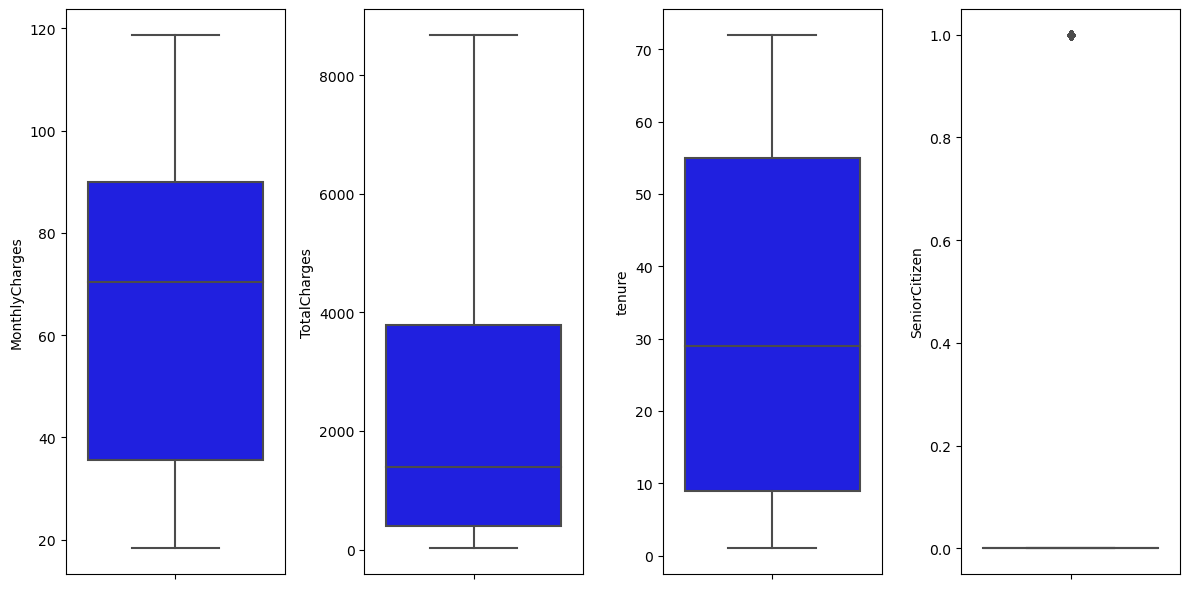

In [116]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numerikal
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='blue')
    plt.tight_layout()

tidak ada outlier pada boxplot, good

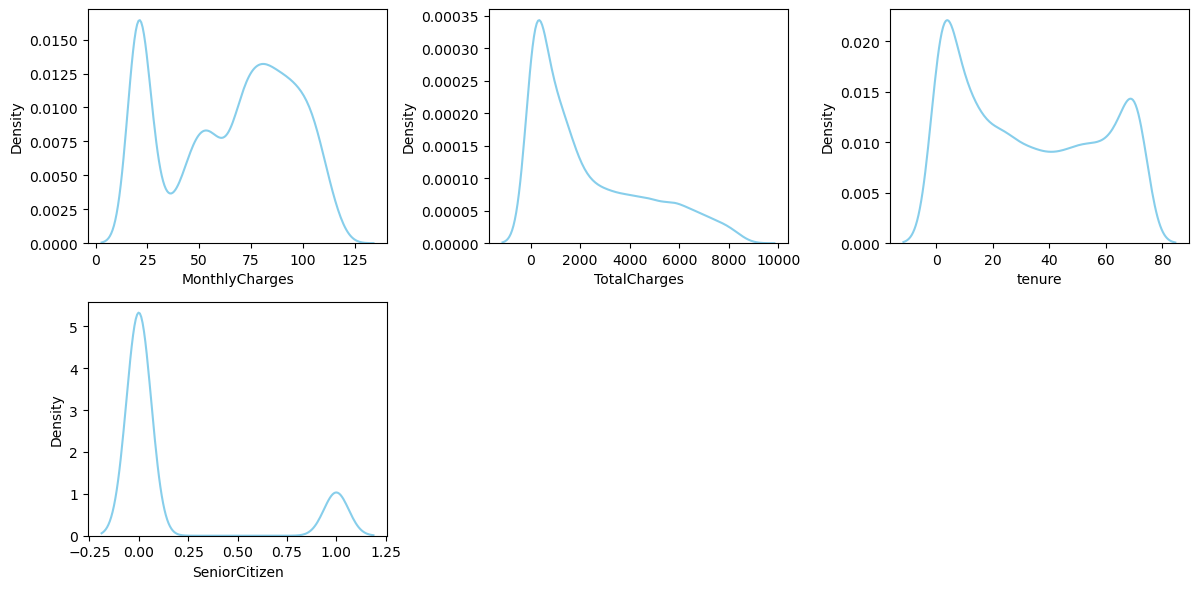

In [117]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numerikal
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.kdeplot(x=data[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

- grafik tenure dan seniorcitizen diabaikan karena bernilai diskrit
- grafik totalcharges skew positif

In [145]:
data[data['Churn'] == 'No']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


<AxesSubplot:xlabel='InternetService', ylabel='count'>

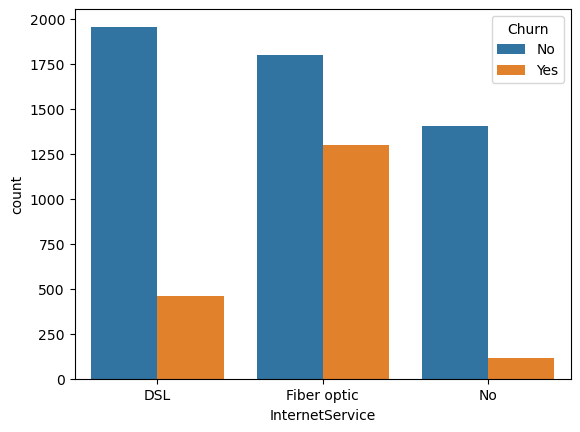

In [148]:
# cari tau hubungan jenis layanan internet dengan churn customer?
ax = sns.countplot(data=data,
            x='InternetService',
            hue='Churn'
            )


customer yang churn paling banyak menggunakan layanan internet fiber optic. Kenapa yang fiber optic yang paling banyak churnnya
,apakah karena kualitasnya lebih rendah dari DSL. sementara itu cutomer yang tidak churn paling banyak menggunakan layanan internet DSL

<AxesSubplot:xlabel='Contract', ylabel='count'>

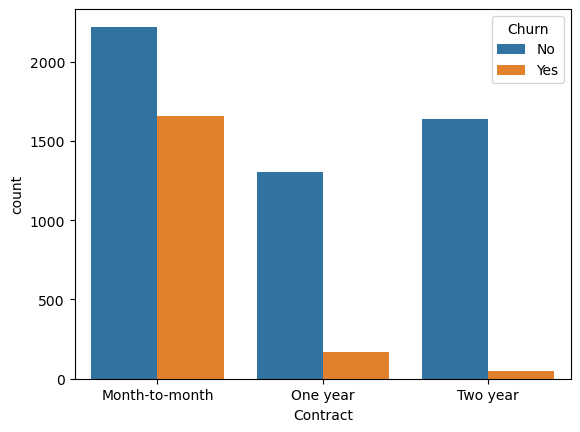

In [153]:
sns.countplot(data=data,
            x='Contract',
            hue='Churn'
            )

customer churn paling banyak yang bayarnya per bulan

<AxesSubplot:>

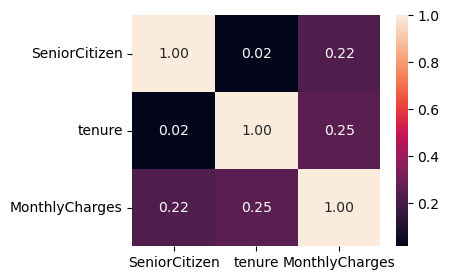

In [16]:
plt.figure(figsize=(4,3))
correlation = data.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

tenure dan TotalCharges memiliki hubungan korelasi yang kuat

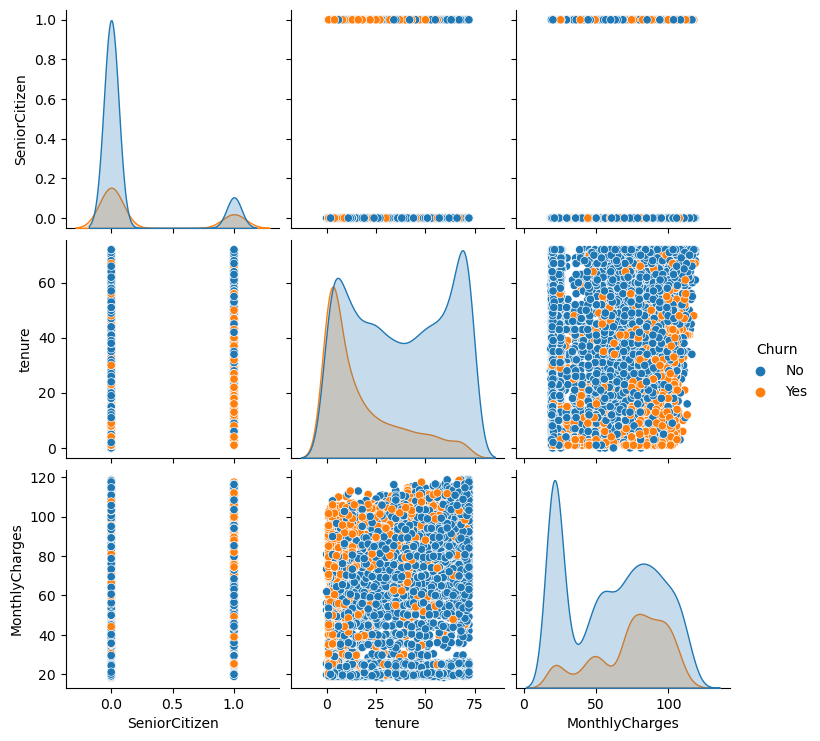

In [18]:
# pairplot of the data
sns.pairplot(data, hue = 'Churn')

- pada distribusi tenure, customer yang churn terkumpul di sekitar 1-3 (satuan waktu bulan/year), berarti pemakainnya belum lama tapi udah churn
- monthlyCharges customer yang churn bayar bulannya terkumpul di atas 75
- 

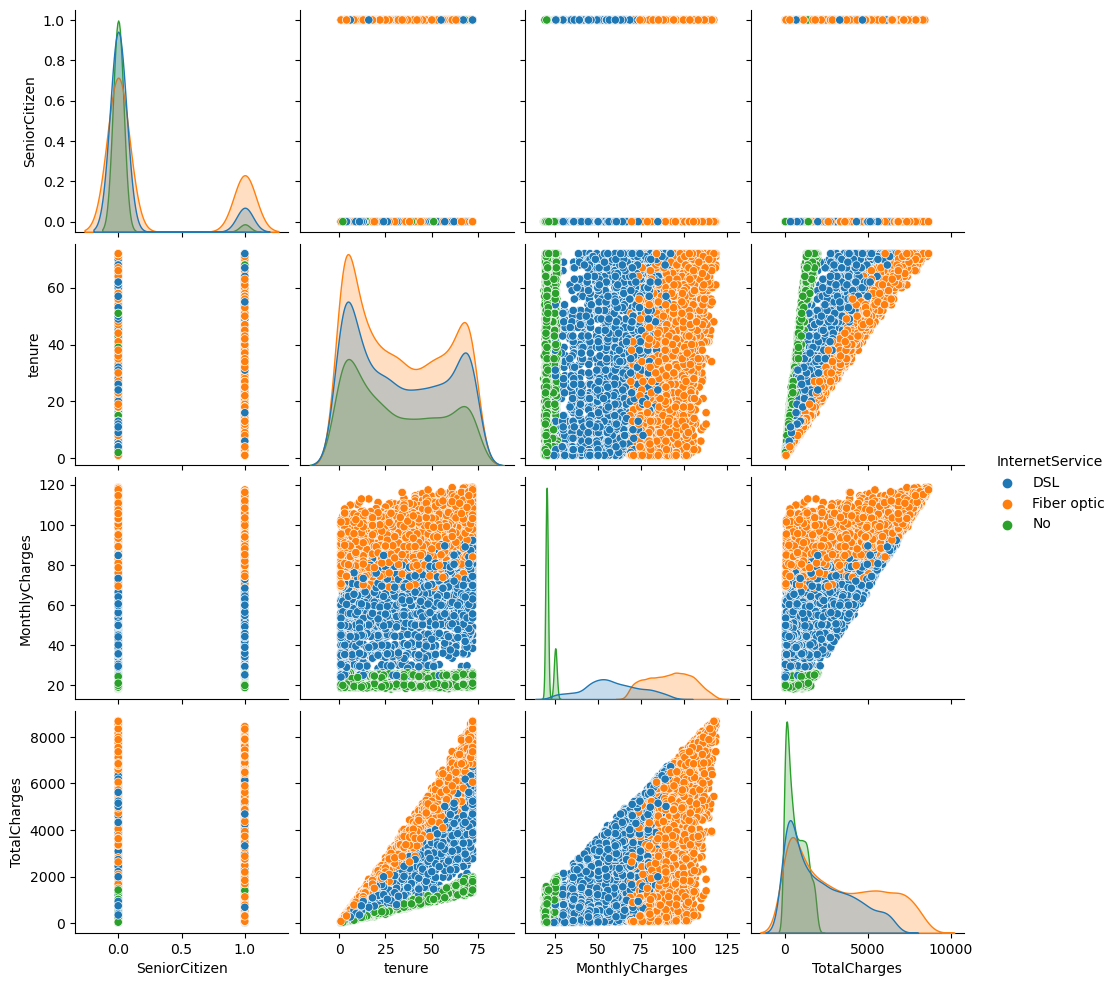

In [157]:
sns.pairplot(data, hue = 'InternetService')

- layanan fiberoptic lebih mahal dibanding DSL 
- customer yang menggunakan layanan internet fiber optic, jangka waktu pemakainnya lebih singkat dibanding layanan DSL 
- customer older lebih banyak menggunakan layanan fiber optic
- customer yang lebih muda, lebih banyak menggunakan layanan internet DSL 


Kesimpulan EDA:
1. secara keseluruhan, tidak ada missing value dan duplicated value
2. overall, nilai minimum dan maksimum masih masuk akal
3. kolom tipe numerikal continu distribusinya tidak terdistribusi normal (imbalance)
4. dari hasil boxplot, tidak ditemukan outlier 
5. pada barchart Internet service, customer yang churn paling banyak menggunakan layanan internet fiber optic dan  cutomer yang tidak churn paling banyak menggunakan layanan internet DSL
6. dari heatmap correlation hubungan variabel tenure dengan variabel TotalCharges memiliki hubungan yang kuat 
7. pada pairplot dengan hue churn, dari distribusi tenure, customer yang churn terkumpul di sekitar 1-3 (satuan waktu bulan/year), berarti pemakainnya belum lama tapi udah churn
8. pada pairplot dengan hue layanan internet;
                 - ditemukan layanan fiberoptic lebih mahal dibanding DSL
                 - customer yang menggunakan layanan internet fiber optic, jangka waktu pemakainnya lebih singkat dibanding 
                   layanan DSL
                 - customer older lebih banyak menggunakan layanan fiber optic
                 - customer yang lebih muda, lebih banyak menggunakan layanan internet DSL
                   

1. siapa top 100 customer terkaya ( dari biaya monthlycharges) ?
2. berapa rata-rata waktu pemakaian layanyanan telco oleh customer yang churn ?
3. siapa saja customer yang menggunakan semua layanan ?

In [205]:
lala = data[['customerID','MonthlyCharges']].sort_values('MonthlyCharges', ascending = False)
lala.head(10)

,customerID,MonthlyCharges
4586,7569-NMZYQ,118.75
2115,8984-HPEMB,118.65
4804,5734-EJKXG,118.60
3894,5989-AXPUC,118.60
5127,8199-ZLLSA,118.35
6118,9924-JPRMC,118.20
4610,2889-FPWRM,117.80
3205,3810-DVDQQ,117.60
6768,9739-JLPQJ,117.50
4875,2302-ANTDP,117.45


In [193]:
churn_time = ( data.groupby('Churn').agg(waktu = ('tenure','mean')).sort_values('waktu',ascending = False))
churn_time

,waktu
Churn,
No,37.650010
Yes,17.979133


In [20]:
churnn = data[data['Churn'] == 'No']
lala = churnn.groupby(['tenure'],as_index = False).size()
lala.sort_values(by = 'size', ascending = False)

,tenure,size
72,72,356
1,1,233
71,71,164
2,2,115
70,70,108
...,...,...
28,28,45
44,44,45
39,39,42
36,36,40


rata-rata waktu user yang churn adalah 18 satuan waktu

In [210]:
data[categorical].sample(4)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
859,5275-PMFUT,Male,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),No
4911,8565-WUXZU,Male,Yes,No,Yes,No,Fiber optic,Yes,Yes,No,Yes,No,No,Two year,Yes,Credit card (automatic),No
4451,1608-GMEWB,Male,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),No
3131,8336-TAVKX,Female,Yes,No,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,Yes,Two year,No,Bank transfer (automatic),No


In [240]:
lala = data[
    (data['PhoneService'] == 'Yes') &
    (data['MultipleLines'] == 'Yes') &
    (data['InternetService'] != 'No') &
    (data['OnlineSecurity'] == 'Yes') &
    (data['OnlineBackup'] == 'Yes')&
    (data['DeviceProtection'] == 'Yes')&
    (data['TechSupport'] == 'Yes') & 
    (data['StreamingTV'] == 'Yes') &
    (data['StreamingMovies'] == 'Yes')]
lala

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
28,5248-YGIJN,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),90.25,6369.45,No
140,3146-MSEGF,Female,1,Yes,Yes,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),88.05,6425.65,No
167,5997-OPVFA,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),89.05,6254.45,No
256,7017-VFHAY,Female,0,Yes,Yes,61,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),115.10,7008.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6768,9739-JLPQJ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),117.50,8670.10,No
6859,3508-CFVZL,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,111.30,7985.90,No
6873,6369-MCAKO,Female,0,Yes,Yes,68,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),89.05,6185.80,No
6910,0530-IJVDB,Male,0,No,Yes,70,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,114.60,7882.50,No


208 user yang menggunakan semua jenis layanan 